# Slicing chunks and beyond

The newest and coolest way to store data in python-blosc2 is through a `SChunk` (super-chunk) object. Here the data is split into chunks of the same size. In the past, the only way of working with it was chunk by chunk (see  tutorials-basics.ipynb), but now, python-blosc2 can retrieve, update or append data at item level (i.e. avoiding doing it chunk by chunk). To see how this works, let's first create our SChunk.

In [1]:
import blosc2
import numpy as np
import plotly.graph_objects as go
import plotly.express as px

In [2]:
shape = (50, 50, 50)
data = np.random.randint(0, 2, shape, dtype=np.int32)
data.shape

(50, 50, 50)

In [11]:
arr = blosc2.asarray(data, chunks=(25, 25, 25))
arr.info

{
    'blocksize': 62500,
    'clevel': 1,
    'codec': <Codec.ZSTD: 5>,
    'codec_meta': 0,
    'filters': [
        <Filter.NOFILTER: 0>,
        <Filter.NOFILTER: 0>,
        <Filter.NOFILTER: 0>,
        <Filter.NOFILTER: 0>,
        <Filter.NOFILTER: 0>,
        <Filter.SHUFFLE: 1>
    ],
    'filters_meta': [0, 0, 0, 0, 0, 0],
    'nthreads': 2,
    'splitmode': <SplitMode.ALWAYS_SPLIT: 1>,
    'typesize': 4,
    'use_dict': 0
}

{'nthreads': 2}

type,NDArray
shape,"(50, 50, 50)"
chunks,"(25, 25, 25)"
blocks,"(25, 25, 25)"
dtype,int32
cratio,19.43
cparams,"{'codec': , 'codec_meta': 0, 'clevel': 1, 'use_dict': 0, 'typesize': 4, 'nthreads': 2, 'blocksize': 62500, 'splitmode': , 'filters': [, , , , , ], 'filters_meta': [0, 0, 0, 0, 0, 0]}"
dparams,{'nthreads': 2}


In [36]:
nchunks_indim = 2
axis = 0
chunks = arr.chunks
start = np.array([0, 0, 0])
stop = np.array(chunks)
imgs = []
nchunks = arr.shape[axis] // chunks[axis]
nchunks

2

In [37]:
for i in range(nchunks):
    sl = arr[start[0]: stop[0], start[1]:stop[1], start[2]:stop[2]]
    imgs.append(np.sum(sl, axis=axis))
    start += chunks
    stop += chunks

In [40]:
for i in range(nchunks):
    idx = np.indices(imgs[i].shape)
    fig = px.scatter(x=idx[0, :, :].flatten(), y=idx[1, :, :].flatten(), 
                        size=imgs[i].flatten())

    fig.update_traces(marker_size = 1)
    # fig.show()
    fig.write_image("../frames/{0}.png".format(i))

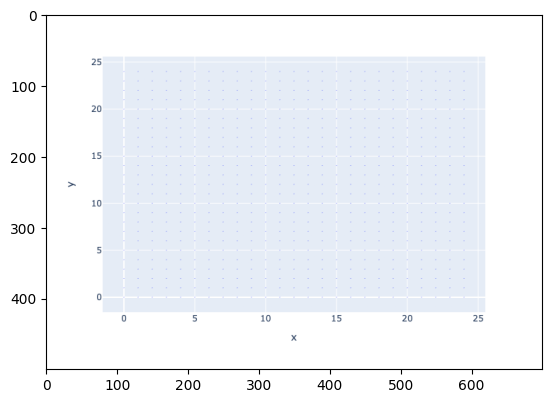

In [41]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation

frames = [] # for storing the generated images
fig = plt.figure()
for i in range(nchunks):
    img = plt.imread("../frames/{0}.png".format(i))
    frames.append([plt.imshow(img, animated=True)])
ani = animation.ArtistAnimation(fig, frames,
                                repeat_delay=1000)
ani.save(filename="./html_example.html", writer="html")
ani.save(filename="./imagemagick_example.gif", writer="imagemagick")

plt.show()